In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

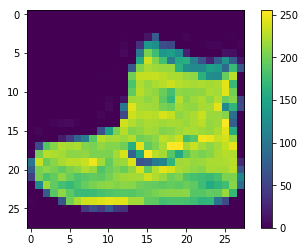

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

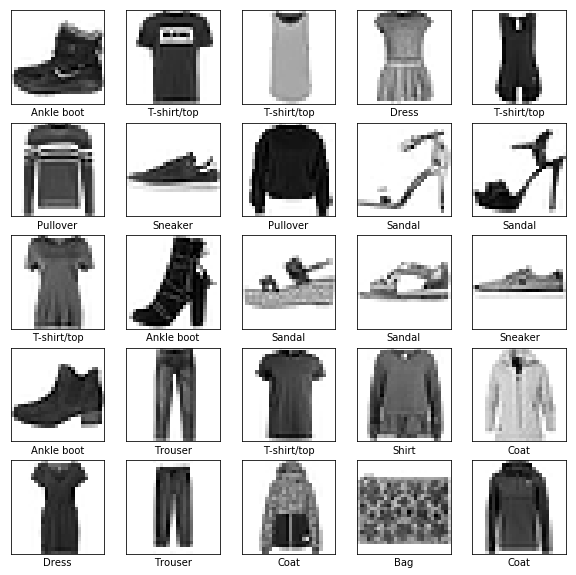

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [31]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(200, activation=tf.nn.tanh),
        keras.layers.Dense(200, activation=tf.nn.tanh),
        keras.layers.Dense(10, activation=tf.nn.tanh)
    ])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 2.7003 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3025 - acc: 0.1741
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3025 - acc: 0.1741
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 2.3025 - acc: 0.1741
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3025 - acc: 0.1742


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 2.3026 - acc: 0.1760
Test accuracy: 0.176


## Make predictions

In [35]:
predictions = model.predict(test_images)

In [36]:
predictions[0]

array([-0.9987345 , -0.99999726, -0.9860047 , -0.9783917 , -1.        ,
       -0.68627   , -0.9997518 , -0.98304456, -0.8799361 , -0.9663558 ],
      dtype=float32)

In [37]:
np.argmax(predictions[0])

5

In [38]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    predictions_array = predictions_array/ np.sum(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    predictions_array = predictions_array/ np.sum(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

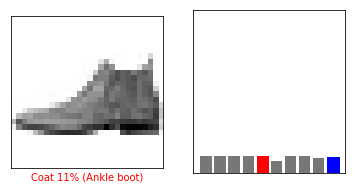

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

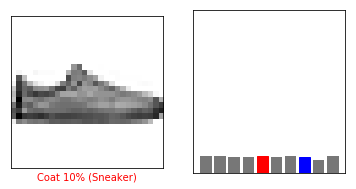

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

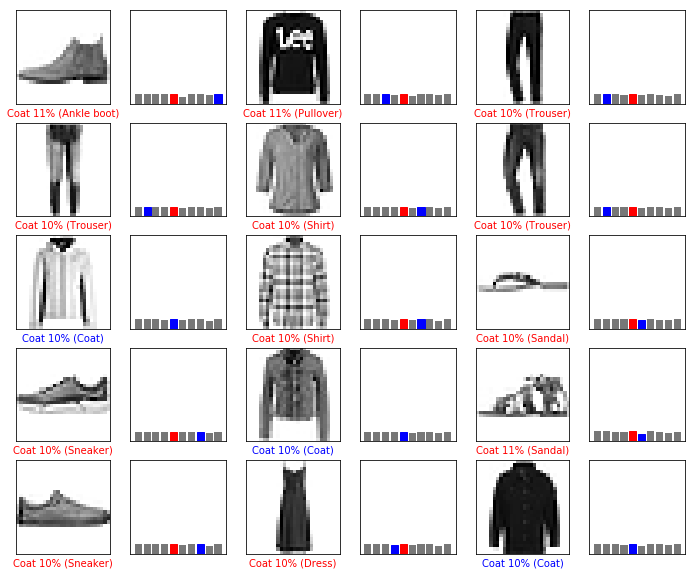

In [42]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [43]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [44]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)

print(predictions_single)

[[-0.9987345  -0.99999726 -0.9860047  -0.9783917  -1.         -0.6862701
  -0.9997518  -0.98304456 -0.8799361  -0.9663558 ]]


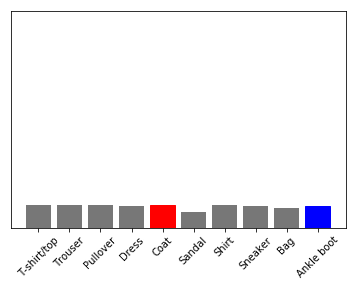

In [46]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [47]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

5


In [48]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_tanh_2_200.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_tanh_2_200.h5")
print("Saved model to disk")

Saved model to disk


In [49]:
weights = []
for layer in model.layers:
    weights.append(layer.get_weights()) # list of numpy arrays